In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sb
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from collections import Counter
import scipy.stats as ss
import datetime
from sklearn import preprocessing,model_selection
from tensorflow import keras
import tensorflow as tf

In [2]:
df = pd.read_csv("ml_assignment_data_train.csv")

In [3]:
df.head(20)

,name,category,main_category,currency,deadline,goal,launched,backers,country,usd_goal_real,new_state
0,The Life and Times of a Nutcracker,Fiction,Publishing,USD,2012-12-01,8000.0,2012-10-26 18:31:19,0,US,8000.00,failed
1,Kochi community outreach 2017,Web,Journalism,GBP,2017-04-28,2000.0,2017-02-27 22:49:51,2,GB,2587.82,failed
2,Get Expert Advice for your Fantasy Football Team,Apps,Technology,USD,2016-09-16,1000.0,2016-08-16 17:54:07,3,US,1000.00,failed
3,Realms of the Ancients (ROTA),Tabletop Games,Games,USD,2013-08-02,30000.0,2013-06-16 00:47:10,49,US,30000.00,failed
4,Innr. Change the way you experience lighting,Product Design,Design,GBP,2013-12-07,50000.0,2013-11-07 17:09:09,165,GB,81349.76,succeeded
5,Mi Temp,Apps,Technology,USD,2014-07-27,6000.0,2014-06-27 15:30:52,8,US,6000.00,failed
6,Day2Night - Convertible High Heel Shoes,Product Design,Design,USD,2011-07-28,15000.0,2011-04-29 18:42:50,121,US,15000.00,succeeded
7,TAPP is a Parent Teacher Communication Innovat...,Software,Technology,USD,2014-06-28,25000.0,2014-05-29 19:34:00,3,US,25000.00,failed
8,The Best Cookies,Food,Food,USD,2014-08-12,10.0,2014-08-02 19:30:54,0,US,10.00,failed
9,Secure your emails. Protect your privacy.,Web,Technology,EUR,2017-05-31,40000.0,2017-04-26 08:47:41,30,DE,44868.20,failed


In [31]:
df.shape

(258325, 11)

In [3]:
df.dtypes

name              object
category          object
main_category     object
currency          object
deadline          object
goal             float64
launched          object
backers            int64
country           object
usd_goal_real    float64
new_state         object
dtype: object

In [33]:
df.isnull().sum()

name             3
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
backers          0
country          0
usd_goal_real    0
new_state        0
dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
df['category_id']= le.fit_transform(df.category.astype(str))
df['main_category_id']= le.fit_transform(df.main_category.astype(str))
df['currency_id']= le.fit_transform(df.currency.astype(str))
df['country_id']= le.fit_transform(df.country.astype(str))
df['new_state_id']= le.fit_transform(df.new_state.astype(str))

In [35]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
backers               int64
country              object
usd_goal_real       float64
new_state            object
category_id           int64
main_category_id      int64
currency_id           int64
country_id            int64
new_state_id          int64
dtype: object

In [36]:
df.country.value_counts()

US      203751
GB       22931
CA        9609
AU        5082
DE        2640
FR        1934
NL        1857
IT        1854
ES        1427
SE        1179
MX        1118
NZ         988
DK         712
IE         542
CH         501
NO         449
BE         416
AT         384
HK         365
SG         348
N,0"       176
LU          47
JP          15
Name: country, dtype: int64

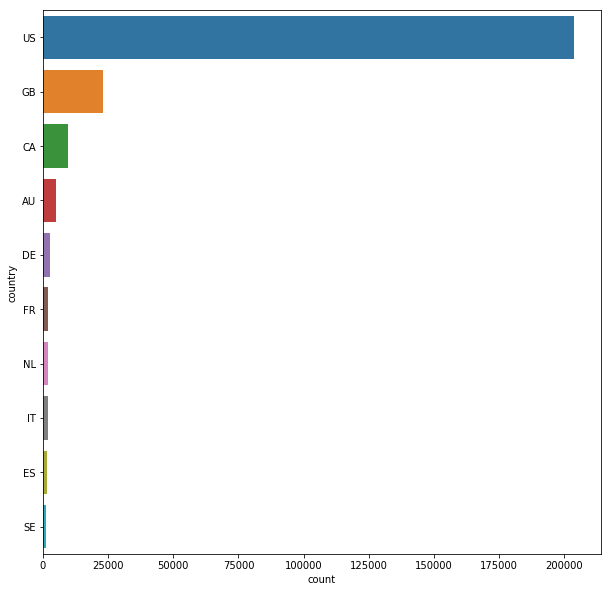

In [28]:
plt.figure(figsize=(10,10))
sb.countplot(y =df.country, order = df.country.value_counts().iloc[:10].index, orient ='v')

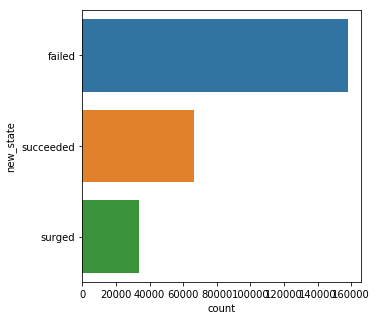

In [57]:
plt.figure(figsize=(5,5))
sb.countplot(y =df.new_state, order = df.new_state.value_counts().iloc[:10].index, orient ='v')

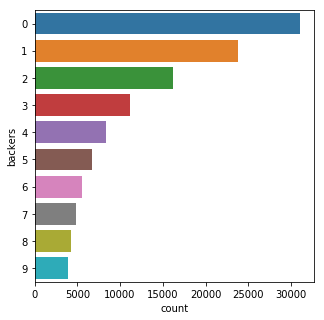

In [60]:
plt.figure(figsize=(5,5))
sb.countplot(y =df.backers, order = df.backers.value_counts().iloc[:10].index, orient ='v')

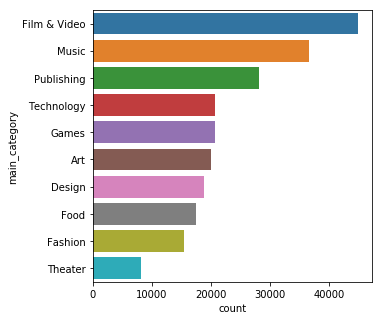

In [33]:
plt.figure(figsize=(5,5))
sb.countplot(y =df.main_category, order = df.main_category.value_counts().iloc[:10].index, orient ='v')

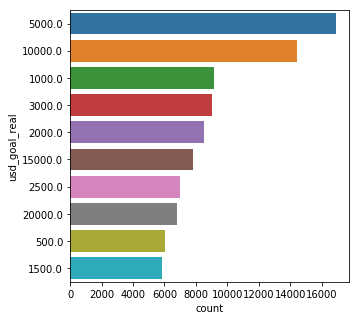

In [34]:
plt.figure(figsize=(5,5))
sb.countplot(y =df.usd_goal_real, order = df.usd_goal_real.value_counts().iloc[:10].index, orient ='v')

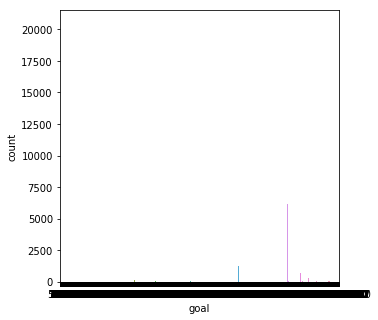

In [37]:
plt.figure(figsize=(10,10))
fig = sb.countplot(df['goal'])

In [ ]:
plt.figure(figsize=(10,10))
fig = sb.countplot(df['usd_goal_real'])

In [5]:
df['log_usd_goal_real']=np.log(df['usd_goal_real']+1)

In [6]:
df['log_goal']=np.log(df['goal']+1)

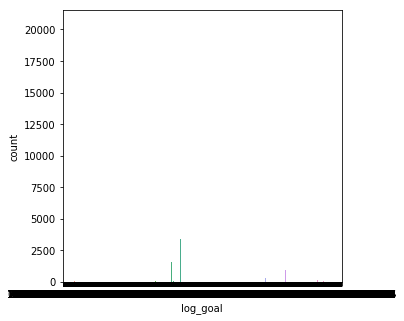

In [45]:
plt.figure(figsize=(5,5))
fig = sb.countplot(df['log_goal'])

/Users/hediehmontazeri/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


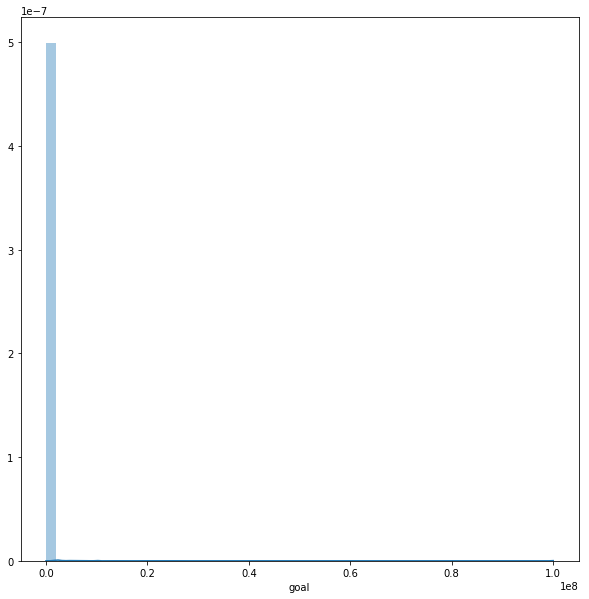

In [49]:
plt.figure(figsize = (10,10))
ax = sb.distplot(df['goal'], kde=True)

/Users/hediehmontazeri/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


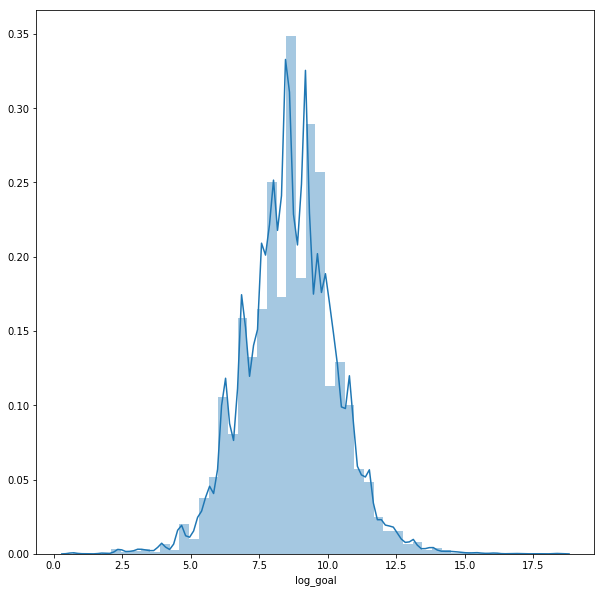

In [48]:
plt.figure(figsize = (10,10))
ax = sb.distplot(df['log_goal'], kde=True)

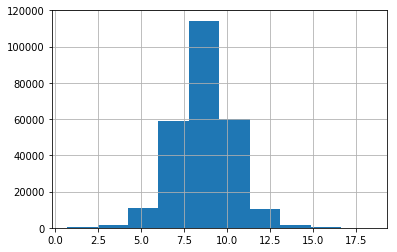

In [53]:
df['log_goal'].hist()

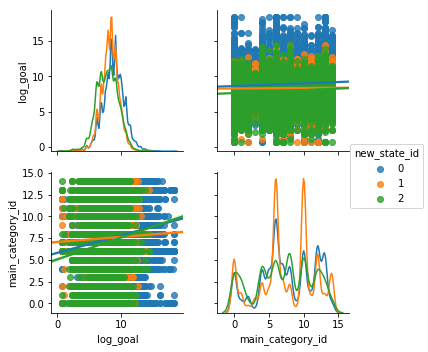

In [54]:
sb.pairplot(df, vars=["log_goal", "main_category_id"], kind = 'reg', hue='new_state_id', diag_kind = 'kde')

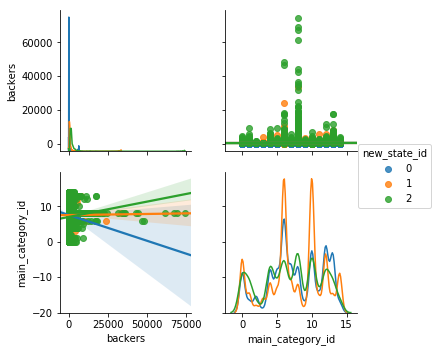

In [58]:
sb.pairplot(trainData, vars=["backers", "main_category_id"], kind = 'reg', hue='new_state_id', diag_kind = 'kde')

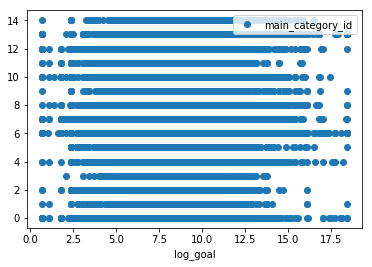

In [62]:
trainData.plot(x='log_goal', y='main_category_id',style='o' )


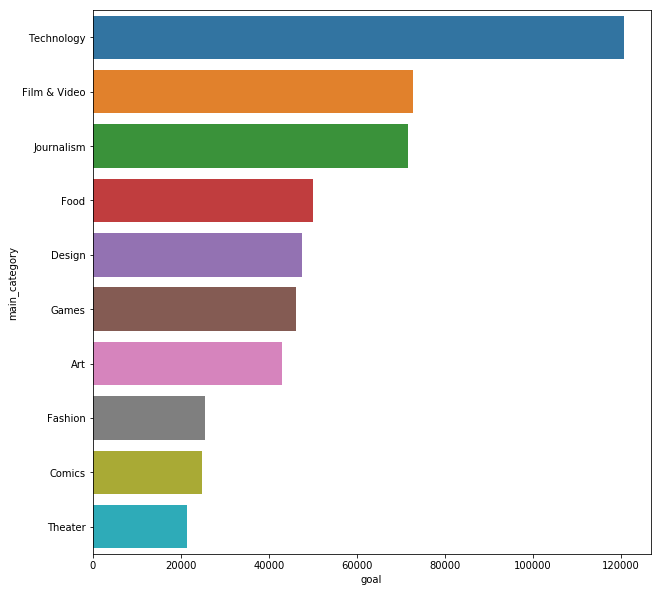

In [67]:
group = df.groupby(df.main_category)
mean_goal = pd.DataFrame(group.goal.mean())
mean_goal = mean_goal.sort_values(by = 'goal', ascending = False).head(10)
mean_goal.reset_index(level =0, inplace = True)

plt.figure(figsize= (10,10))
sb.barplot(x='goal', y='main_category', data = mean_goal, orient = 'h')

In [39]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [40]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

#two categorical cariables
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [7]:
#changing the type so that categorical columns such as item_condition_id doesn't have an order
df['backers']= df['backers'].astype('object')
df['category_id']= df['category_id'].astype('object')
df['main_category_id']= df['main_category_id'].astype('object')
df['currency_id']= df['currency_id'].astype('object')
df['new_state_id']= df['new_state_id'].astype('object')
df['country_id']= df['country_id'].astype('object')


In [8]:
df.dtypes

name                  object
category              object
main_category         object
currency              object
deadline              object
goal                 float64
launched              object
backers               object
country               object
usd_goal_real        float64
new_state             object
category_id           object
main_category_id      object
currency_id           object
country_id            object
new_state_id          object
log_usd_goal_real    float64
log_goal             float64
dtype: object

In [9]:
df['launched_date'], df['launched_hour'] = df['launched'].str.split(' ',2).str

In [10]:
df['launched_date'] = pd.to_datetime(df['launched_date'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['time_interval']= df['launched_date'] - df['deadline']

In [7]:
df.dtypes

name                  object
category              object
main_category         object
currency              object
deadline              object
goal                 float64
launched              object
backers                int64
country               object
usd_goal_real        float64
new_state             object
category_id            int64
main_category_id       int64
currency_id            int64
country_id             int64
new_state_id           int64
log_usd_goal_real    float64
log_goal             float64
dtype: object

In [39]:
df['time_interval']

0        -36 days
1        -60 days
2        -31 days
3        -47 days
4        -30 days
5        -30 days
6        -90 days
7        -30 days
8        -10 days
9        -35 days
10       -30 days
11       -40 days
12       -30 days
13       -21 days
14       -32 days
15       -30 days
16       -27 days
17       -30 days
18       -30 days
19       -45 days
20       -52 days
21       -20 days
22       -28 days
23       -25 days
24       -21 days
25       -30 days
26       -30 days
27       -30 days
28       -19 days
29       -30 days
           ...   
258295   -34 days
258296   -20 days
258297   -45 days
258298   -30 days
258299   -30 days
258300   -30 days
258301   -28 days
258302   -30 days
258303   -30 days
258304   -30 days
258305   -25 days
258306   -60 days
258307   -60 days
258308   -30 days
258309   -14 days
258310   -21 days
258311   -30 days
258312   -40 days
258313   -30 days
258314   -21 days
258315   -30 days
258316   -30 days
258317   -30 days
258318   -32 days
258319   -

In [11]:
df['time_interval_int'] = df['time_interval'] / np.timedelta64(1, 'D')

In [12]:
df['time_interval_int'].dtype

dtype('float64')

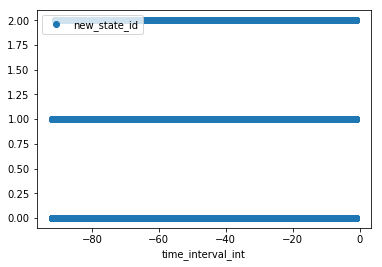

In [44]:
df.plot(x='time_interval_int', y='new_state_id',style='o')

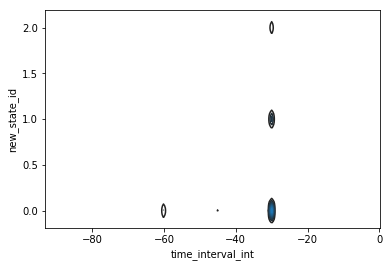

In [53]:
sns.kdeplot(df.time_interval_int, df.new_state_id)

In [13]:
import datetime
df['deadline'] = pd.to_datetime(df['deadline'])

In [21]:
df['deadline'].dtypes

dtype('<M8[ns]')

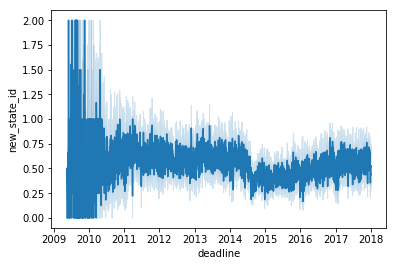

In [27]:
import seaborn as sns
sns.lineplot(data = df, x='deadline', y = 'new_state_id')

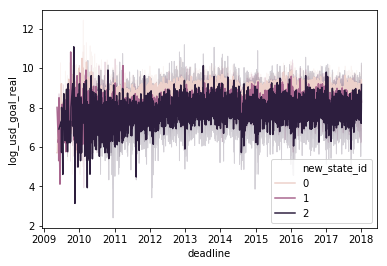

In [28]:
import seaborn as sns
sns.lineplot(data = df, x='deadline', y = 'log_usd_goal_real' , hue = 'new_state_id')

In [17]:
df['time_interval'].dtype

dtype('<m8[ns]')

In [18]:
df['time_interval']= df['time_interval'].dt.days

In [19]:
df['deadline_year'] = df['deadline'].dt.year
df['deadline_month'] = df['deadline'].dt.month
df['deadline_day'] = df['deadline'].dt.day

In [20]:
df['time_interval'].dtype

dtype('int64')

In [82]:
#item_desription is all text, so dropping that to speed up the processing time
trainDataC= df.drop(['name'],axis= 1)
trainDataC= trainDataC.drop(['category_id'],axis= 1)
trainDataC= trainDataC.drop(['deadline'],axis= 1)
trainDataC= trainDataC.drop(['launched'],axis= 1)
trainDataC= trainDataC.drop(['main_category_id'],axis= 1)
trainDataC= trainDataC.drop(['currency_id'],axis= 1)
trainDataC= trainDataC.drop(['country_id'],axis= 1)
trainDataC= trainDataC.drop(['new_state_id'],axis= 1)

In [83]:
relations = pd.DataFrame()
columns = trainDataC.columns[1:len(trainDataC.columns)]#columns labels
rows = trainDataC.columns[1:len(trainDataC.columns)] # rows     
for j in range(0,len(columns)):
    for i in range(0,len(rows)):
        if (trainDataC[columns[j]].dtypes == 'float64'  and trainDataC[rows[i]].dtypes == 'float64'):
            u = trainDataC[columns[j]].corr( trainDataC[rows[i]])
            u = u*1
            relations.loc[rows[i],columns[j]] = u
        elif  (trainDataC[rows[i]].dtypes == 'O' and trainDataC[columns[j]].dtypes == 'float64'):
            u = correlation_ratio(trainDataC[rows[i]], trainDataC[columns[j]])
            u = u*1
            u=2*u-1
            relations.loc[rows[i],columns[j]] = u
        elif (trainDataC[columns[j]].dtypes == 'O' and trainDataC[rows[i]].dtypes == 'float64' ):
            u = correlation_ratio(trainDataC[columns[j]], trainDataC[rows[i]])
            u = u*1
            u=2*u-1
            relations.loc[rows[i],columns[j]] = u
        elif (trainDataC[columns[j]].dtypes == 'O' and trainDataC[rows[i]].dtypes == 'O'):
            u = theils_u(trainDataC[columns[j]], trainDataC[rows[i]])
            u = u*1
            u=2*u-1
            relations.loc[rows[i],columns[j]] = u
relations.fillna(value=np.nan,inplace=True)

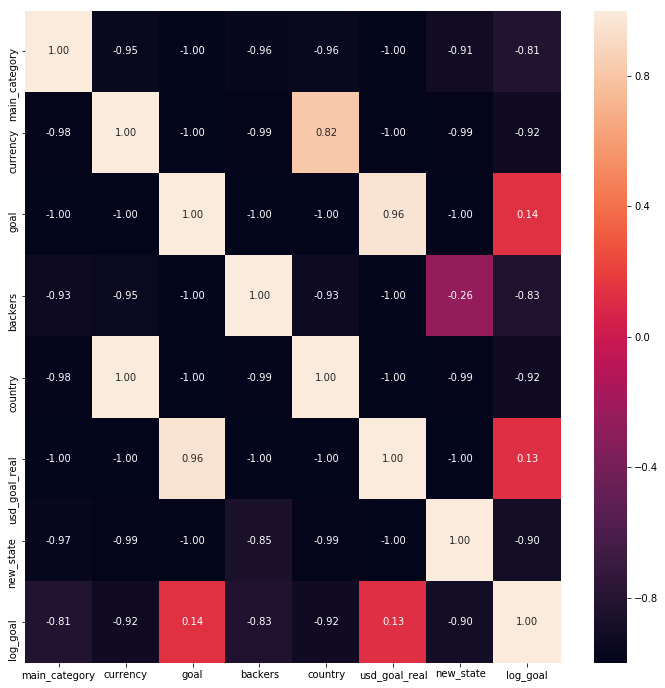

In [84]:
plt.figure(figsize=(12,12))
sb.heatmap(relations,annot=True,fmt='.2f')
plt.show()